In [155]:
import numpy as np
from pylab import *
%matplotlib inline
from plot_fredda import load4d
import sigproc
import os
import fdmt
reload(fdmt)

<module 'fdmt' from '/home/ban115/craft/craft/python/fdmt.pyc'>

In [173]:
thedir = '/data/TETHYS_1/ban115/testdata/sim_highdm'
# Works with a noise only input single beam
boxcar_all = load4d(os.path.join(thedir, 'boxcar_e20.dat'))
print(boxcar_all.shape)
nbeam, ndm, nt, nbox = boxcar_all.shape
bc = boxcar_all[0, :, :, :]
widths = np.arange(1, bc.shape[2]+1)
weights = load4d(os.path.join(thedir, 'fdmtweights.dat'))[0,0,0,:]
hits = weights**-2


/data/TETHYS_1/ban115/testdata/sim_highdm/boxcar_e20.dat (1, 4096, 256, 32) 1 Nzeros= 0 max/min/mean/sum 11.1743192673/-9.73913860321/0.0128436647356/430961.875 max at (0, 3595, 53, 20) NaNs? 0 Ninfs?= 0
(1, 4096, 256, 32)
/data/TETHYS_1/ban115/testdata/sim_highdm/fdmtweights.dat (1, 1, 1, 4096) 1 Nzeros= 0 max/min/mean/sum 0.0546358376741/0.0154211577028/0.0238346066326/97.6265487671 max at (0, 0, 0, 1) NaNs? 0 Ninfs?= 0


In [174]:
stdvbc = bc.std(axis=1)
print(stdvbc.shape)


(4096, 32)


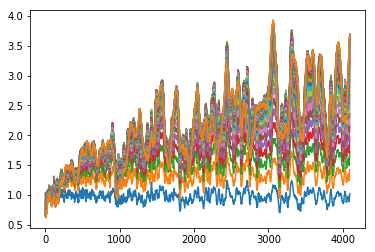

In [175]:
_ = plot(stdvbc)

[336.00003 335.      336.00003 337.      338.      339.00003 340.00003
 341.      342.      343.     ]


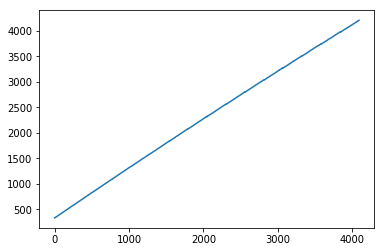

In [211]:
plot(hits)
print(hits[0:10])

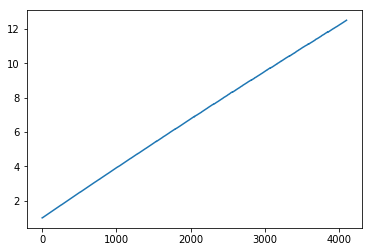

In [196]:
thits = hits/nchan
dweights = (1.0/thits)
dweights = thits/thits
plot(thits)


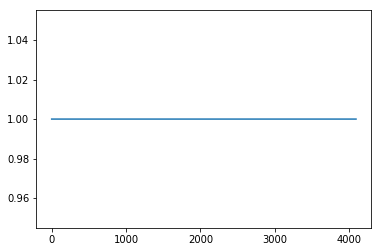

In [197]:
plot(dweights)

In [198]:
bcweight = bc*dweights[np.newaxis, :, np.newaxis, np.newaxis]

In [199]:
bcweight_std = bcweight[0,:,:,:].std(axis=1)


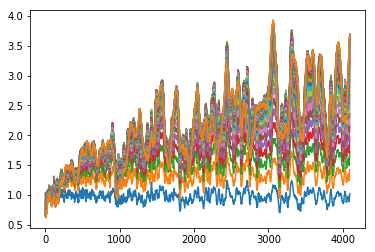

In [200]:
# Corrected 
_ = plot(bcweight_std)

In [201]:
# haha - but it doesn't work like that becuase bc has already been weighted by sqrt(width) and the FDMT weights - so we need to undo that
width_weights = np.sqrt(widths)[np.newaxis, np.newaxis, :]
bcraw = bc*width_weights
bcraw /= weights[:, np.newaxis, np.newaxis]

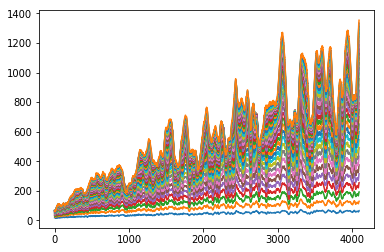

In [202]:
bcraw_std = bcraw.std(axis=1)
_ = plot(bcraw_std)

(4096, 256, 32)


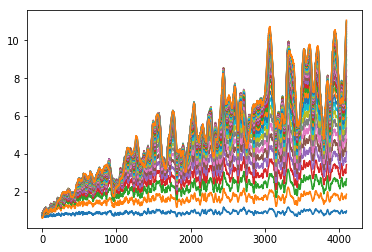

In [203]:
bcfixed = bcraw.copy()
print(bcfixed.shape)
nd, nt, nbox = bcfixed.shape
for d in range(nd):
    for b in range(nbox):
        avgtwidth = hits[d]/nchan
        totaltwidth = b+1 + avgtwidth
        bcfixed[d, :, b] *= 1.0/np.sqrt(totaltwidth)/np.sqrt(nchan)
bcfixed_std = bcfixed.std(axis=1)
_ = plot(bcfixed_std[:, :])

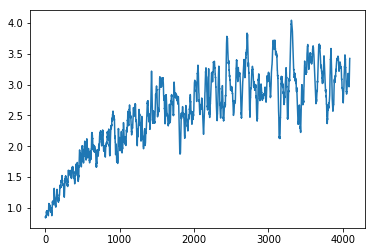

In [204]:
_ = plot(bcfixed_std[:, 3])

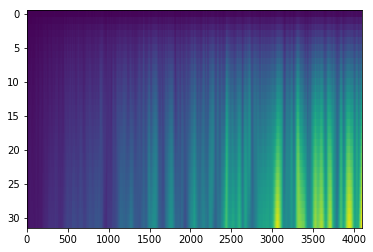

In [205]:
_ = imshow(bcraw_std[:, :].T, aspect='auto')

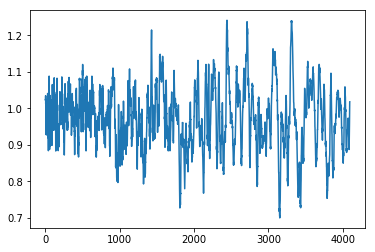

In [206]:
# Width = 0 scaled by sqrt(nhits) works OK
plot(bcraw_std[:, 0]/np.sqrt(hits))

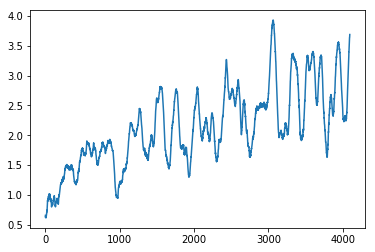

In [207]:
# Width = 31 scaled by sqrt(nhits) and sqrt(w+1) works OK for DM around 0  but we're missing a factor of about 1.5 at the highest DMS
plot(bcraw_std[:, 31] /np.sqrt(hits)/np.sqrt(31+1))

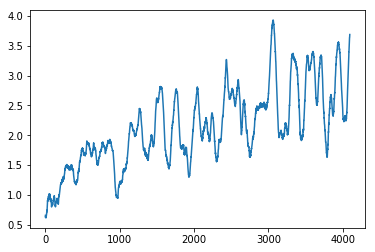

In [208]:
# Width = 31 scaled by sqrt(nhits) and sqrt(w+1) works OK for DM around 0  but we're missing a factor.
plot(bcraw_std[:, 31] /np.sqrt(hits)/np.sqrt(31+1))

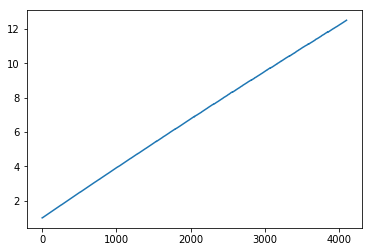

In [209]:
avgtwidth = hits/nchan # mean width in samples vs DM
_ = plot(avgtwidth)

In [210]:
# so actually the boxcar avgtwidth = the boxcar width